In [35]:
import pandas as pd
!pip install python-rake
import RAKE
import operator
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import wordcloud as w
import matplotlib.pyplot as plt
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score
!pip install scikit-plot
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics.pairwise import euclidean_distances

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

1. Import Dataset

In [37]:
df_job = pd.read_csv('/job_sample_dice.csv')
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


2. Cleaning of Data

In [38]:
# 2.1 Remove unneccessary columns
## Remove postdate, shift, sitename 
df_job.drop('postdate', inplace=True, axis=1) 
df_job.drop('shift',inplace=True, axis=1) 
df_job.drop('site_name', inplace=True, axis =1) 
df_job.drop('uniq_id', inplace=True, axis = 1) 
df_job.drop('jobid', inplace=True, axis =1)
# Preview the first 5 lines of the Loaded data 
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."


In [39]:
# 2.2 Remove Duplicates
df_job.drop_duplicates()
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."


In [40]:

# 2.3 Drop Empty and Rubbish Words
# Checking if we have any missing values at all
print(df_job.isnull().values.any())

True


In [41]:
# Since we have missing values, checking the number of missing values
df_job.isna().sum()

advertiserurl                 0
company                      50
employmenttype_jobstatus    230
jobdescription                0
joblocation_address           3
jobtitle                      0
skills                       43
dtype: int64

In [42]:
# Droppping all rows that have NaN values
df_job.dropna(inplace = True)

# Check once again for missing values
df_job.isna().sum()

advertiserurl               0
company                     0
employmenttype_jobstatus    0
jobdescription              0
joblocation_address         0
jobtitle                    0
skills                      0
dtype: int64

In [43]:
# Get index of all rows in skills that contains the value "Null"
jobsNull = df_job[df_job["skills"]=="Null"].index
# Get index of all rows in skills that contains the value "Please see job description"
jobsDesc1 = df_job[df_job["skills"]=="Please see job description"].index
# Get index of all rows in skills that contains the value (See Job Description)
jobsDesc2= df_job[df_job["skills"]=="(See Job Description)"].index
# Get index of all rows in skills that contains the value "SEE BELOW"
jobsDesc3 = df_job[df_job["skills"]=="SEE BELOW"].index
# Get index of all rows in skills that contains the value "Telecommuting not available Travel not required"
jobsDesc4 = df_job[df_job["skills"]=="Telecommuting not available Travel not required"].index
# Get index of all rows in skills that contains the value "Refer to Job Description"
jobsDesc5 = df_job[df_job["skills"]=="Refer to Job Description"].index
#Get index of all rows in skills that contains the value "Please see Required Skills"
jobsDesc6 = df_job[df_job["skills"]=="Please see Required Skills"].index
#drop rows of index
df_job.drop(jobsNull, inplace=True)
df_job.drop(jobsDesc1, inplace=True)
df_job.drop(jobsDesc2, inplace=True)
df_job.drop(jobsDesc3, inplace=True)
df_job.drop(jobsDesc4, inplace=True)
df_job.drop(jobsDesc5, inplace=True)
df_job.drop(jobsDesc6, inplace=True)

In [44]:

df_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 1 to 21998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             21612 non-null  object
 1   company                   21612 non-null  object
 2   employmenttype_jobstatus  21612 non-null  object
 3   jobdescription            21612 non-null  object
 4   joblocation_address       21612 non-null  object
 5   jobtitle                  21612 non-null  object
 6   skills                    21612 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


Visualisation of Data

In [45]:
# 3.1 Most Demanded Jobs
df_job['jobtitle'].value_counts()[:5]

Java Developer       174
Project Manager      144
Network Engineer     127
Software Engineer    118
Business Analyst     117
Name: jobtitle, dtype: int64

In [46]:
from nltk.corpus import stopwords
job=[]
stopwordsList = []
cleanJobs = []

In [47]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [48]:
stopwordsList = stopwords.words('english')
# Convert all words to Lower case and change the short form 
for i in df_job['jobtitle'].values:
                jobs = i. lower() 
                jobs = jobs.replace("A", "Quality Assurance") 
                jobs = jobs.replace("sr","Senior") 
                jobs = jobs.replace("jr","Junior") 
                jobs = jobs.replace("m","Quality Manager") 
                job.append(jobs)

# tokenize and remove the words from stop words 
for j in job:
    text_tokens = word_tokenize(j)
    tokens_without_sw = [f for f in text_tokens if not f in stopwordsList] 
    cleanJobs.append(' '.join(tokens_without_sw))

In [49]:
df_job['clean_jobtitle'] = cleanJobs
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,clean_jobtitle
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",inforQuality Manageration security engineer
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",business solutions architect
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",devops engineer
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",sap fico architect
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,"Atlanta, GA",Network Engineer,"Cisco, DNS, HTTP, Networking, Network Engineer...",network engineer


In [50]:
# Get top 5 jobs
qty = df_job['clean_jobtitle'].value_counts()[:5].tolist()
label = df_job['clean_jobtitle'].value_counts()[:5].index.tolist()
print(qty)
print("Top 5 Popular Jobs : "+str(label))

[190, 174, 132, 130, 121]
Top 5 Popular Jobs : ['java developer', 'project Quality Manageranager', 'business analyst', 'network engineer', 'software engineer']


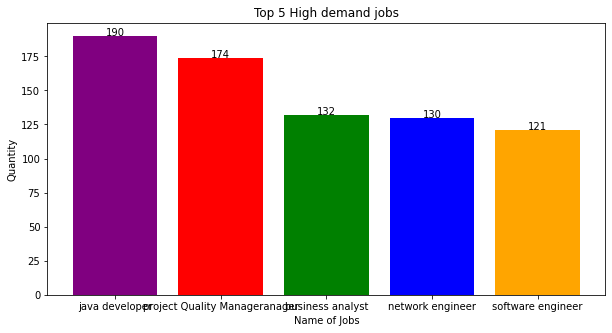

In [51]:
def addlabels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
## initializing the labels 
skillslabel = label 
jobQty = qty

# setting figure size by using figure() function 
plt.figure(figsize = (10, 5))

# making the bar chart on the data 
plt.bar(skillslabel, jobQty, color=['purple', 'red', 'green', 'blue', 'orange'])

# calling the function to add value Labels 
addlabels(skillslabel, jobQty)

# giving title to the plot 
plt.title("Top 5 High demand jobs")

# giving X and Y Labels 
plt.xlabel("Name of Jobs") 
plt.ylabel("Quantity")
# visualizing the plot 
plt.show()

In [52]:
# Most used Skills
skillsTokenized = [] 
stopwordsSkills = stopwordsList

for k in df_job['skills'].values:
                k = str(k).split(', ') 
                #remove stopwords from skills 
                skillstokens_without_sw = [f for f in k if not f.lower() in stopwordsSkills] 
                for j in skillstokens_without_sw:
                        skillsTokenized.append(j)
#put the cleaned skills into a new dataframe 
df = pd. DataFrame({'skills':skillsTokenized})

In [53]:
# Get top 5 skills
qtySkills = df['skills'].value_counts().tolist()
labelSkills = df['skills'].value_counts().tolist()
print("Top 5 Skills mostly needed: \n"+ str(df['skills'].value_counts()[:5]))

Top 5 Skills mostly needed: 
Development    1680
Java           1668
SQL            1559
Management     1509
JavaScript     1012
Name: skills, dtype: int64


3. Data Mining

In [54]:
# 3.1 TF-IDF

vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df_job['clean_jobtitle'].values) 
print(X.shape) 
analyze = vectorizer.build_analyzer() 
features = vectorizer.get_feature_names()

(21612, 4836)


4. Clustering using KMeans

In [55]:
true_k = 7
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter=600, n_init=1, random_state = 42)
pred = model.fit_predict(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

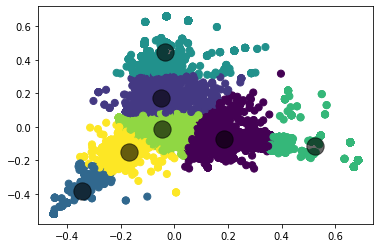

In [56]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X.toarray()) 
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=600, n_init=1, random_state=42) 
fitted = kmeans.fit(Y_sklearn) 
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers [:, 1],c='black', s=300, alpha=0.6);

In [57]:
import numpy as np
# Silhouette score value ranges from - 1 to 1.
# metric used to calculate the goodness of a clustering technique
# 1: means clusters are are well apart from each other and clearly distinguished 
from sklearn.metrics import silhouette_score 
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(X, model.labels_, metric='euclidean' )))

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame (data.todense()).groupby (clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms: ]]))
get_top_keywords(X, pred, features, 10)

KMeans Scaled Silhouette Score: 0.039146590206601994

Cluster 0
specialist,managerinistrator,technical,senior,lead,adquality,manager,consultant,quality,architect

Cluster 1
linux,business,senior,analyst,manager,engineer,managerinistrator,adquality,managers,systequality

Cluster 2
stack,application,ui,front,end,software,web,senior,net,developer

Cluster 3
data,qa,managerent,test,security,devops,network,senior,software,engineer

Cluster 4
managerquality,manager,technical,quality,support,security,senior,data,business,analyst

Cluster 5
developquality,prograquality,managerent,technical,manager,product,senior,project,quality,manageranager

Cluster 6
stack,software,full,architect,core,lead,engineer,senior,developer,java


5. Classification

In [58]:
## Do further classification, Give the 0,1,2,3 a name to understand better 
#Cluster 0 = Project Management, cluster 1= frontend , cluster 2 - Devops/Software Engineer, 
#cluster 3 = Business Solution Consulatant, cluster 4 = Cloud Architect/Network, 
#cluster 5= Analyst, cluster 6 = IT Business Management
label = []
for i in df_job['clean_jobtitle'].values:
                vec = vectorizer.transform([i]) 
                pred = model.predict(vec) 
                if pred == 0:
                    label.append("Project Management") 
                elif pred == 1:
                    label.append("Frontend") 
                elif pred == 2:
                    label.append("Devops/Software Engineer") 
                elif pred == 3:
                    label.append("Business Solution Consultant") 
                elif pred == 4:
                    label.append("Cloud Architect/Network") 
                elif pred == 5:
                    label.append("Analyst") 
                else:
                    label.append("IT Business Management")

df_job['Label'] = label
df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,clean_jobtitle,Label
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",inforQuality Manageration security engineer,Business Solution Consultant
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",business solutions architect,Project Management
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",devops engineer,Business Solution Consultant
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",sap fico architect,Project Management
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,"Atlanta, GA",Network Engineer,"Cisco, DNS, HTTP, Networking, Network Engineer...",network engineer,Business Solution Consultant


In [59]:
jobSkills = []
for i in df_job['skills']:
    jobSkills.append(i.lower())
    
Xclass = vectorizer.fit_transform(jobSkills)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(Xclass, label, test_size=0.2, random_state = 42)


In [60]:
final_df = df_job

In [61]:
import pickle
pickle.dump(final_df, open('dice_df.pkl', 'wb'))

In [62]:
pickle.dump(Xclass, open('xclass.pkl', 'wb'))
pickle.dump(label, open('label.pkl', 'wb'))

In [63]:
pickle.dump(Xclass, open('xclass_for_splitting.pkl', 'wb'))

In [64]:
pickle.dump(jobSkills, open('jobskills.pkl', 'wb'))

Evaluating on different Machine Learning Models

In [65]:
# !pip install lazypredict
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0,ignore_warnings=True)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

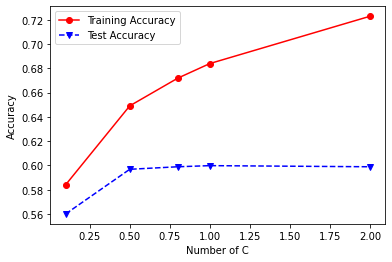

In [66]:
# 5.1 Logistic Regression

# Obtain the best C range 
Cparamrange = [0.1,0.5,0.8,1,2]
trainAcc = [] 
testAcc = []
for i in Cparamrange:
    lrg = LogisticRegression(penalty = 'l2', C = i, random_state = 42) 
    lrg.fit(X_train,y_train) 
    lrg_predtrain=lrg.predict(X_train) 
    lrg_predtest=lrg.predict(X_test) 
    trainacc = accuracy_score(y_train, lrg_predtrain)
    testacc = accuracy_score(y_test, lrg_predtest) 
    trainAcc.append(trainacc) 
    testAcc.append(testacc)
    
    
plt.plot(Cparamrange, trainAcc, 'ro-', Cparamrange, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C') 
plt.ylabel('Accuracy')
plt.show()

In [67]:
# C = 0.1 is able to get the optimal accuracy

# Using best c param range
lrg = LogisticRegression(penalty = 'l2', C = 0.1, random_state = 42) 
lrg.fit(X_train,y_train) 
lrg_pred=lrg.predict(X_test) 
lrg_acc = accuracy_score(y_test, lrg_pred)
print("Accuracy of Logistic Regression: " + str(lrg_acc)) 
print(classification_report(y_test, lrg_pred))

Accuracy of Logistic Regression: 0.5600277585010409
                              precision    recall  f1-score   support

                     Analyst       0.79      0.29      0.42       363
Business Solution Consultant       0.65      0.25      0.36       662
     Cloud Architect/Network       0.76      0.25      0.37       341
    Devops/Software Engineer       0.60      0.43      0.50       660
                    Frontend       0.52      0.08      0.14       202
      IT Business Management       0.62      0.41      0.49       220
          Project Management       0.53      0.89      0.66      1875

                    accuracy                           0.56      4323
                   macro avg       0.64      0.37      0.42      4323
                weighted avg       0.60      0.56      0.52      4323



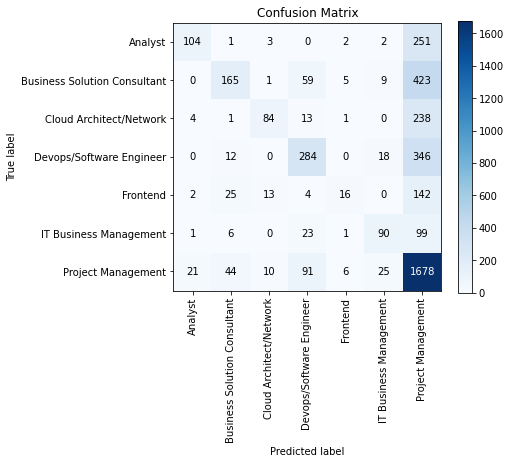

In [68]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test, 
    lrg_pred, 
    x_tick_rotation = 90,
    figsize=(6, 5))


Text(0, 0.5, 'Accuracy')

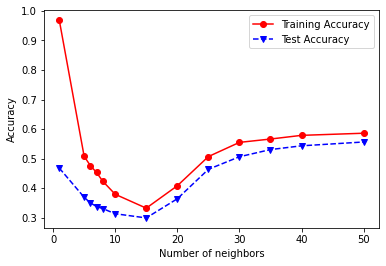

In [69]:
# 5.2 KNeighbours Classifier

%matplotlib inline
numNeighbors = [1, 5, 6,7, 8, 10, 15, 20, 25, 30,35,40,50] 
trainAcc = []
testAcc = []
for k in numNeighbors:
    clf1 = KNeighborsClassifier (n_neighbors=k, metric='minkowski', p=2) 
    clf1.fit(X_train, y_train) 
    Y_predTrain = clf1.predict(X_train) 
    Y_predTest = clf1.predict(X_test) 
    trainAcc.append(accuracy_score(y_train, Y_predTrain)) 
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--') 
plt.legend(['Training Accuracy', 'Test Accuracy']) 
plt.xlabel('Number of neighbors') 
plt. ylabel('Accuracy')

In [70]:
# Let 50 be the n_neighbours

knn = KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2) 
knn. fit(X_train, y_train) 
knn_pred = clf1.predict(X_test) 
knn_acc = accuracy_score(y_test, knn_pred) 
print("Accuracy of KNN: " + str(knn_acc)) 
print(classification_report(y_test, knn_pred))

Accuracy of KNN: 0.5563266250289151
                              precision    recall  f1-score   support

                     Analyst       0.72      0.45      0.55       363
Business Solution Consultant       0.50      0.39      0.44       662
     Cloud Architect/Network       0.64      0.25      0.36       341
    Devops/Software Engineer       0.43      0.77      0.55       660
                    Frontend       0.46      0.15      0.23       202
      IT Business Management       0.55      0.51      0.53       220
          Project Management       0.63      0.67      0.65      1875

                    accuracy                           0.56      4323
                   macro avg       0.56      0.46      0.47      4323
                weighted avg       0.57      0.56      0.54      4323



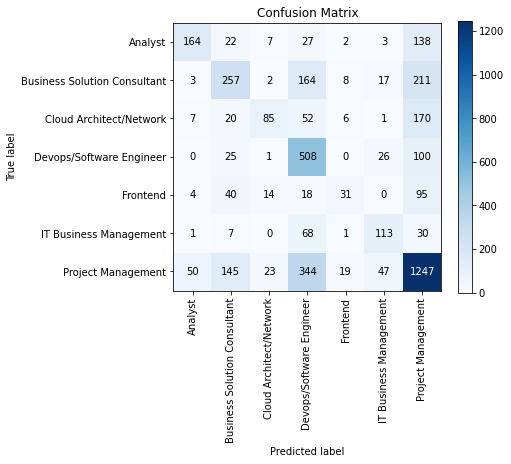

In [71]:
skplt.metrics.plot_confusion_matrix(
y_test, 
knn_pred, 
x_tick_rotation=90,
figsize=(6, 5))

Text(0, 0.5, 'Accuracy')

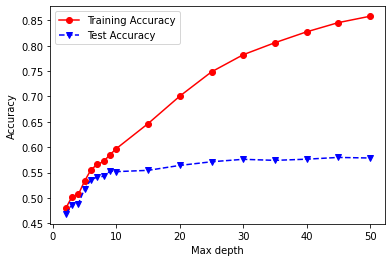

In [72]:
# 5.3 Decision Tree
from sklearn.tree import DecisionTreeClassifier
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
# 17 different depths
trainAccuracy = np.zeros(len(maxdepths)) 
testAccuracy = np.zeros(len(maxdepths))
index = 0 

for depth in maxdepths:
    clf2 = DecisionTreeClassifier(max_depth=depth) 
    clf2 = clf2.fit(X_train, y_train) 
    Y_predTrain = clf2.predict(X_train) 
    Y_predTest = clf2.predict(X_test) 
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(y_test, Y_predTest) 
    index += 1

# Plot training and test accuracies

plt.plot(maxdepths, trainAccuracy, 'ro-',maxdepths, testAccuracy, 'bv--') 
plt.legend (['Training Accuracy', 'Test Accuracy']) 
plt.xlabel('Max depth') 
plt.ylabel('Accuracy')

In [73]:
# Let max depth be 7
dt = DecisionTreeClassifier(max_depth=10) 
dt2 = dt.fit(X_train, y_train) 
dt_pred = dt2.predict(X_test) 
dt_acc = accuracy_score(y_test,dt_pred) 
print("Accuracy of Decision Tree: " + str(dt_acc)) 
print(classification_report(y_test, dt_pred))

Accuracy of Decision Tree: 0.5505436039787185
                              precision    recall  f1-score   support

                     Analyst       0.62      0.47      0.54       363
Business Solution Consultant       0.58      0.20      0.30       662
     Cloud Architect/Network       0.73      0.38      0.50       341
    Devops/Software Engineer       0.63      0.32      0.42       660
                    Frontend       0.45      0.24      0.31       202
      IT Business Management       0.52      0.59      0.55       220
          Project Management       0.53      0.83      0.65      1875

                    accuracy                           0.55      4323
                   macro avg       0.58      0.43      0.47      4323
                weighted avg       0.57      0.55      0.52      4323



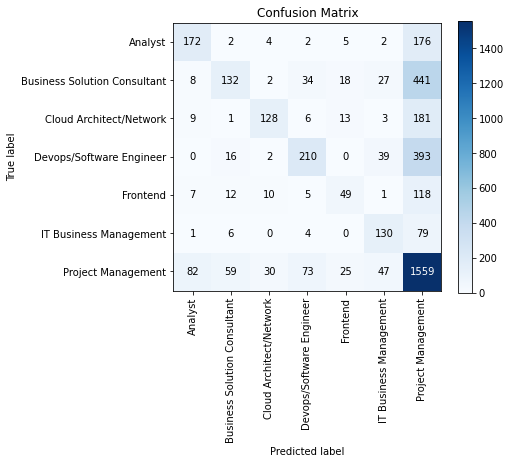

In [74]:
skplt.metrics.plot_confusion_matrix(
y_test, 
dt_pred, 
x_tick_rotation=90,
figsize=(6, 5))

In [75]:
# 5.4 Random Forest
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=100)
rf = rf.fit(X_train, y_train) 

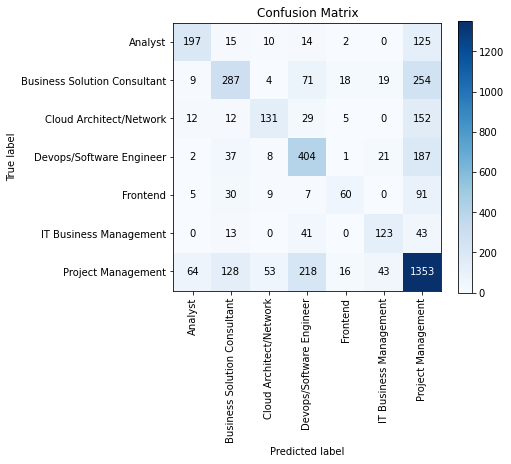

In [76]:
rf_pred= rf.predict(X_test)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, rf_pred)  
skplt.metrics.plot_confusion_matrix(
y_test, 
rf_pred, 
x_tick_rotation=90,
figsize=(6, 5))

In [77]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy score of Random Forest "+str(rf_acc))

Accuracy score of Random Forest 0.5910247513300948


In [78]:
# 5.5 Support Vector Machines
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)  
svm = svm.fit(X_train, y_train) 

In [79]:
import pickle
pickle.dump(svm, open('svm.pkl', 'wb'))

In [80]:
krn = ['linear', 'poly', 'rbf', 'sigmoid']
rng_C = np.arange(1, 52, 10)
rng_deg = np.arange(3, 8)
rng_co = np.arange(0.001, 10, 0.5)
rng_gam = ['auto', 'scale']

In [81]:
from sklearn.model_selection import GridSearchCV

param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':np.arange(1,42,10),
      'degree':np.arange(3,6),   
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale')}

In [82]:
# svModel = SVC()
# GridS = GridSearchCV(svModel, param, cv = 5)
# GridS.fit(X_train, y_train)

In [83]:
# GridS.best_params_

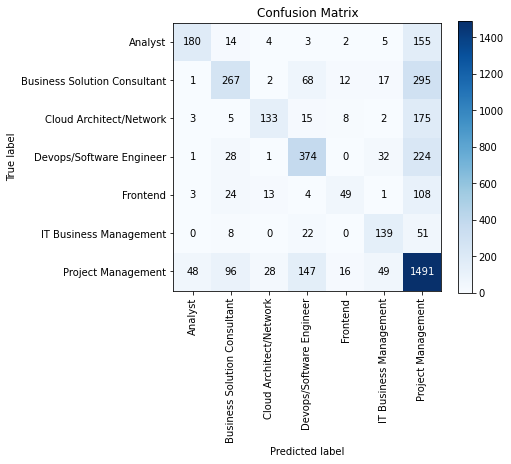

In [84]:
svm_pred = svm.predict(X_test)
skplt.metrics.plot_confusion_matrix(
y_test, 
svm_pred, 
x_tick_rotation=90,
figsize=(6, 5))

In [85]:
svm_acc = accuracy_score(y_test, svm_pred) 
print("Accuracy of SVM: " + str(svm_acc)) 

Accuracy of SVM: 0.6090677770067083


In [86]:
# 5.6 Naive Bayes
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB()  
X_train_arr = X_train.toarray()
gnb = gnb.fit(X_train_arr, y_train) 

In [87]:
X_test_arr = X_test.toarray()
gnb_pred = gnb.predict(X_test_arr)
nv_acc = accuracy_score(y_test, gnb_pred)  
print("Accuracy of Naive Bayes: "+str(nv_acc))

Accuracy of Naive Bayes: 0.2824427480916031


In [88]:
# 5.4 Support Vector Machines

# from sklearn import svm
# Csvm = [0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]
# trainAcc = [] 
# testAcc = []
# for c in Csvm:
#     modelsvm = svm.SVC(C= c, gamma= 1, kernel= 'rbf') 
#     svmfit = modelsvm.fit(X_train, y_train) 
#     Y_predTrain = modelsvm.predict(X_train) 
#     Y_predTest = modelsvm.predict(X_test) 
#     trainAcc.append(accuracy_score(y_train, Y_predTrain)) 
#     testAcc.append(accuracy_score(y_test, Y_predTest))
    
# plt.plot(Csvm, trainAcc, 'ro-', Csvm, testAcc, 'bv--') 
# plt.legend(['Training Accuracy', 'Test Accuracy']) 
# plt.xlabel('Number of C') 
# plt.ylabel('Accuracy')

In [89]:
# skplt.metrics.plot_confusion_matrix(
# y_test, 
# svm_predictions, 
# x_tick_rotation=90,
# figsize=(6, 5))

6. Determine Best Classification to use

Text(0.5, 1.0, 'Model Accuracy')

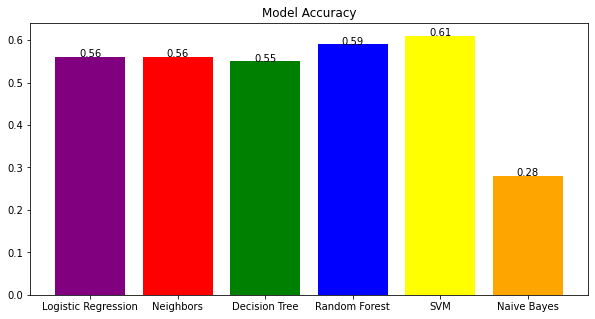

In [90]:
# 6.1 Accuracy

def addlabels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
#initializing the labels and model accuracy. The model accuracy round up to 2dp 
labels = ("Logistic Regression", "Neighbors" ,"Decision Tree", "Random Forest", "SVM", "Naive Bayes")
modelsAccuracy = [round(lrg_acc, 2), round(knn_acc, 2), round(dt_acc, 2), round(rf_acc, 2), round(svm_acc, 2), round(nv_acc, 2)]

                  
#setting figure size by using figure() function 
plt.figure(figsize = (10,5))
#making the bar chart on the data
plt.bar(labels, modelsAccuracy, color=('purple', 'red', 'green', 'blue', 'yellow', 'orange'))
#calling the function to add value Labels 
addlabels(labels, modelsAccuracy)
#giving title to the plot
plt.title("Model Accuracy")

In [91]:
# 6.2 ROC
# Predict probabilities 
lrg_prob = lrg.predict_proba(X_test)[::,1]
knn_prob = knn.predict_proba(X_test)[::,1]
dt_prob = dt.predict_proba(X_test)[::,1]
#svm_prob = svm.predict_proba(X_test)[::,1]
#roc curve for models
fprlrg, tprlrg, threshlrg = roc_curve(y_test, lrg_prob, pos_label='Business Solution Consultant') 
fprknn, tprknn, threshknn = roc_curve(y_test, knn_prob, pos_label='Business Solution Consultant') 
fprdt, tprdt, threshdt = roc_curve(y_test, dt_prob, pos_label='Business Solution Consultant') 
#fprsvm, tprsvm, threshsvm = roc_curve(y_test, svm_prob, pos_label='Business Solution Consultant')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label= 'Business Solution Consultant')

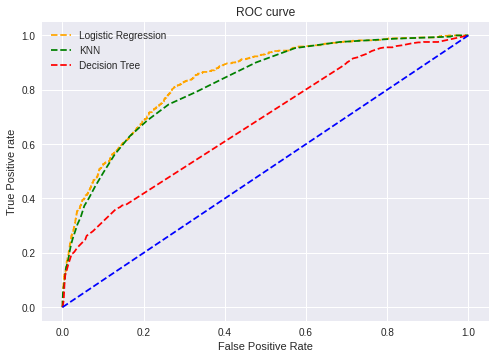

In [92]:
plt.style.use('seaborn')
# plot roc curves 
plt.plot(fprlrg, tprlrg, linestyle='--',color='orange', label='Logistic Regression') 
plt.plot(fprknn, tprknn, linestyle='--',color='green', label='KNN')
plt.plot(fprdt, tprdt, linestyle='--',color='red', label='Decision Tree') 
#plt.plot(fprsvm, tprsvm, linestyle='..',color='purple', label='SVM') 
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') 
# title
plt.title('ROC curve')
# X Label
plt.xlabel('False Positive Rate')
# y Label 
plt.ylabel('True Positive rate')
plt.legend (loc='best')
plt.savefig('ROC',dpi=300) 
plt.show();

7. Data Analysis

In [93]:
# 7.1 Finding out what are the skills needed for each job role

In [94]:
# Frontend
labelData = df_job[df_job['Label'] == "Frontend" ]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills] 
    for j in skillstokens_without_sw:
        skillsClass.append(j)
        
# put the cleaned skills into a new dataframe 
df_frontend = pd.DataFrame({ 'skills':skillsClass})
qtySkills = df_frontend["skills"].value_counts().tolist() 
labelSkills = df_frontend ["skills"].value_counts().index.tolist()

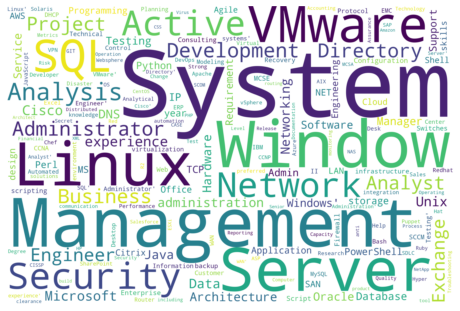

<Figure size 216000x216000 with 0 Axes>

In [95]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [96]:
# Analyst
labelData = df_job[df_job['Label'] == "Analyst"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f. lower() in stopwordsSkills] 
    for j in skillstokens_without_sw:
        skillsClass.append(j)
# put the cleaned skills into a new dataframe 
df_analyst = pd. DataFrame({ 'skills':skillsClass})
qtySkills = df_analyst["skills"].value_counts().tolist() 
labelSkills = df_analyst["skills"].value_counts().index.tolist()

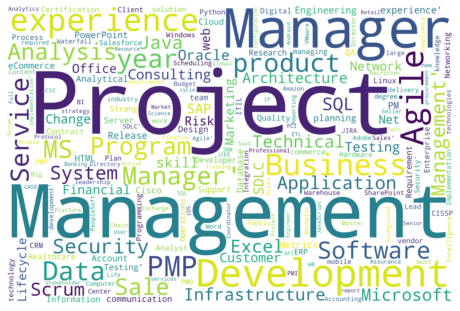

<Figure size 216000x216000 with 0 Axes>

In [97]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [98]:
# Business Solution Consultation
labelData = df_job[df_job['Label'] == "Business Solution Consultant"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
#put the cleaned skills into a new dataframe
df_consultant = pd. DataFrame({'skills':skillsClass})
qtySkills = df_consultant["skills"].value_counts().tolist() 
labelSkills = df_consultant["skills"].value_counts().index.tolist()

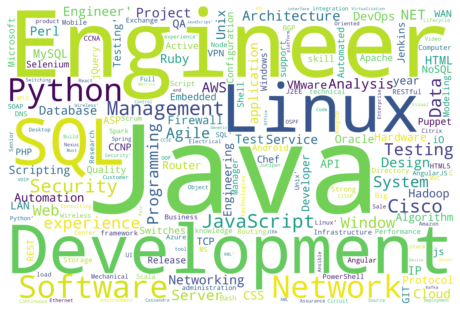

<Figure size 216000x216000 with 0 Axes>

In [99]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [100]:
# Cloud Architect/Network
labelData = df_job[df_job['Label'] == "Cloud Architect/Network"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
#put the cleaned skills into a new dataframe
df_consultant = pd. DataFrame({'skills':skillsClass})
qtySkills = df_consultant["skills"].value_counts().tolist() 
labelSkills = df_consultant["skills"].value_counts().index.tolist()

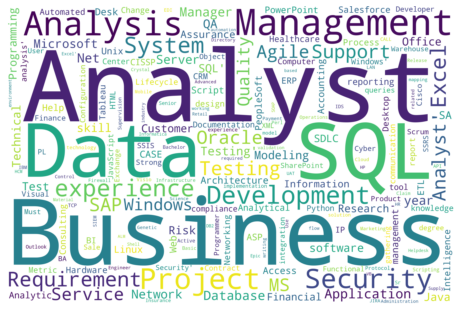

<Figure size 216000x216000 with 0 Axes>

In [101]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [102]:
# Developer/Software Engineer

labelData = df_job[df_job['Label'] == "Devops/Software Engineer"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
#put the cleaned skills into a new dataframe
df_engineer = pd. DataFrame({'skills':skillsClass})
qtySkills = df_engineer["skills"].value_counts().tolist() 
labelSkills = df_engineer["skills"].value_counts().index.tolist()

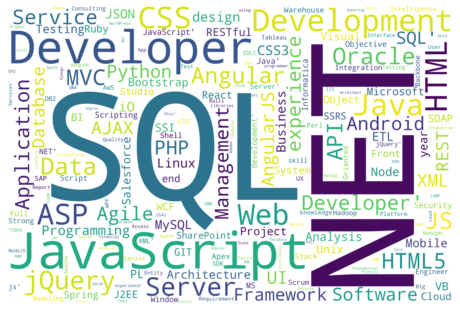

<Figure size 216000x216000 with 0 Axes>

In [103]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [104]:
# IT Business Management
labelData = df_job[df_job['Label'] == "IT Business Management"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
#put the cleaned skills into a new dataframe
df_bus = pd. DataFrame({'skills':skillsClass})
qtySkills = df_bus["skills"].value_counts().tolist() 
labelSkills = df_bus["skills"].value_counts().index.tolist()

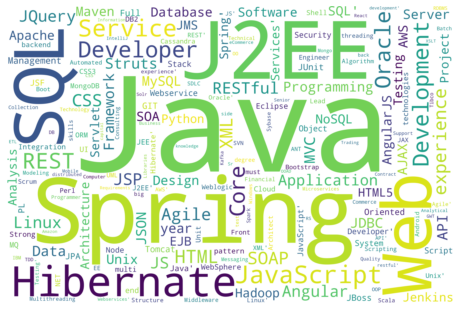

<Figure size 216000x216000 with 0 Axes>

In [105]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [106]:
# Project Management
labelData = df_job[df_job['Label'] == "Project Management"]
skillsClass = []
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillstokens_without_sw = [f for f in skills if not f.lower() in stopwordsSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
#put the cleaned skills into a new dataframe
df_bus = pd. DataFrame({'skills':skillsClass})
qtySkills = df_bus["skills"].value_counts().tolist() 
labelSkills = df_bus["skills"].value_counts().index.tolist()

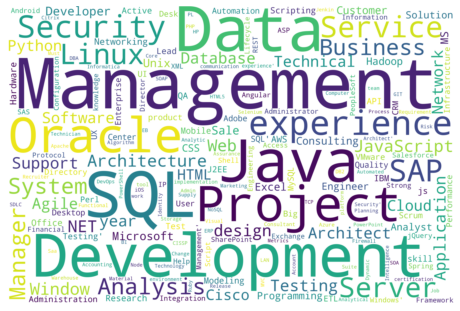

<Figure size 216000x216000 with 0 Axes>

In [107]:
lskills = labelSkills
frequencies = qtySkills

# Wordcloud asks for a string
d = dict(zip(lskills, frequencies))
wordcloud = w.WordCloud(collocations=False, random_state=1, background_color = 'white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

8. Get User Input

In [108]:
userInput = input("Enter your skills: ")
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print(output[0]);

Enter your skills: java, python, ruby
Business Solution Consultant


From the class, find the one that suits most to the user's input by cosine distance

In [109]:
cos = [] 
labelData = df_job[df_job['Label'] == output[0]]
for index, row in labelData.iterrows():
    skills = [row['skills']] 
    skillvec = vectorizer.transform(skills) 
    cos_lib = cosine_similarity(skillvec, pred)
    cos.append(cos_lib[0][0])
    
labelData['cosine_similarity'] = cos

In [110]:
# Display top 5 Recommendation from cosine similarity
top = labelData.sort_values('cosine_similarity', ascending = False)
top.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,clean_jobtitle,Label,cosine_similarity
1012,https://www.dice.com/jobs/detail/Junior-Softwa...,AVID Technical Resources,C2H W2,"Our client, a leader in analytics, is looking ...","Lexington, MA",Junior Software/Automation Engineer,"Linux, Programming, Java, Python, Ruby",junior software/autoQuality Manageration engineer,Business Solution Consultant,0.781351
4689,https://www.dice.com/jobs/detail/Sr.-Full-Stac...,Serverlogic,Full Time,Our client is looking for a talented software...,"Bellevue, WA",Sr. Full Stack Software Engineer,"Ruby, JavaScript, Python, Angular",Senior . full stack software engineer,Business Solution Consultant,0.676414
6712,https://www.dice.com/jobs/detail/Senior-Java-%...,Visionaire Partners,Full Time,Must be authorized to work in the U.S./ Sponso...,"Duluth, GA",Senior Java & DevOps Engineer - BHJOB2052_12504,"java, spring, devops, cloud, ruby, python",senior java & devops engineer - bhjob2052_12504,Business Solution Consultant,0.650678
18107,https://www.dice.com/jobs/detail/Software-Engi...,Vistaprint USA Inc.,Full Time,Are you thrilled by at the prospect of workin...,"Waltham, MA",Software Engineer II,"Node.js / JavaScript, Java, C#, Python and Ruby",software engineer ii,Business Solution Consultant,0.640207
21248,https://www.dice.com/jobs/detail/Senior-DevOps...,Oracle Corporation,Full Time,Oracle Storage Cloud is looking for skilled an...,"Santa Clara, CA",Senior DevOps Engineer,"Linux, Python, Ruby, Perl, Networking",senior devops engineer,Business Solution Consultant,0.593297


9. Final Job Recommendation

In [111]:
userInput = input("Enter your skills")
pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)
print("You may look into "+output[0]+" jobs ")
print("Here is a list of jobs that is under "+output[0])

cos = []
labelData = df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
    skills = [row['skills']]
    skillVec = vectorizer.transform(skills)
    cos_lib = cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

top =labelData.sort_values('cosine_similarity', ascending = False)
top.head()

Enter your skillsjava python, ruby, management
You may look into Business Solution Consultant jobs 
Here is a list of jobs that is under Business Solution Consultant


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,clean_jobtitle,Label,cosine_similarity
1012,https://www.dice.com/jobs/detail/Junior-Softwa...,AVID Technical Resources,C2H W2,"Our client, a leader in analytics, is looking ...","Lexington, MA",Junior Software/Automation Engineer,"Linux, Programming, Java, Python, Ruby",junior software/autoQuality Manageration engineer,Business Solution Consultant,0.719999
4689,https://www.dice.com/jobs/detail/Sr.-Full-Stac...,Serverlogic,Full Time,Our client is looking for a talented software...,"Bellevue, WA",Sr. Full Stack Software Engineer,"Ruby, JavaScript, Python, Angular",Senior . full stack software engineer,Business Solution Consultant,0.623301
6712,https://www.dice.com/jobs/detail/Senior-Java-%...,Visionaire Partners,Full Time,Must be authorized to work in the U.S./ Sponso...,"Duluth, GA",Senior Java & DevOps Engineer - BHJOB2052_12504,"java, spring, devops, cloud, ruby, python",senior java & devops engineer - bhjob2052_12504,Business Solution Consultant,0.599586
18107,https://www.dice.com/jobs/detail/Software-Engi...,Vistaprint USA Inc.,Full Time,Are you thrilled by at the prospect of workin...,"Waltham, MA",Software Engineer II,"Node.js / JavaScript, Java, C#, Python and Ruby",software engineer ii,Business Solution Consultant,0.589937
21248,https://www.dice.com/jobs/detail/Senior-DevOps...,Oracle Corporation,Full Time,Oracle Storage Cloud is looking for skilled an...,"Santa Clara, CA",Senior DevOps Engineer,"Linux, Python, Ruby, Perl, Networking",senior devops engineer,Business Solution Consultant,0.546710


In [112]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))